In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ./methods.py

ModuleNotFoundError: No module named 'methods.py'; 'methods' is not a package

In [3]:
sample_path="tgs_salt/1bd1c8c771.png"
sample_semantic_mask_path="tgs_salt/1bd1c8c771Mask.png"
generat_mask_path="tgs_salt/0bdd44d530Mask.png" 

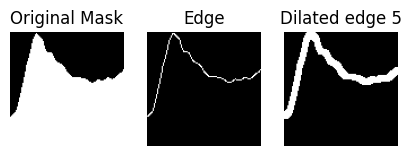

In [4]:
mask = cv2.imread("tgs_salt/1bd1c8c771Mask.png")
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(mask,100,200)
kernel = np.ones((5,5))
dilated_edge = cv2.dilate(edges, kernel, iterations=1)
# plt imshow 3 columns
plt.figure(figsize=(5,5))
plt.subplot(131),plt.imshow(mask,cmap = 'gray')
plt.title('Original Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Edge'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(133),plt.imshow(dilated_edge,cmap = 'gray')
plt.title('Dilated edge 5'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()